Zadatak 1 Predviđanje potrošnje energije uređaja

Cilj zadatka

Primijeniti metode statističke analize podataka na datasetu Predviđanje potrošnje energije
uređaja kako biste:

• Proveli deskriptivnu statistiku nad relevantnim varijablama

• Izgradili i analizirali linearni regresijski model

• Procijenili parametre modela, intervale povjerenja i adekvatnost modela

• Izračunati koeficijent korelacije između odabranih varijabli i interpretirati rezultate

Dataset: Korisiti dani dataset koji sadrži podatke o predviđanjima potrošnje energije uređaja



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import seaborn as sn

Koraci za rješavanje zadatka

1. Učitavanje i pregled podataka

a. Učitati dataset u Python

b. Ispitajte i interpretirajte strukturu podataka i provjerite ima li nedostajućih
vrijednosti


In [5]:
data = pd.read_csv('sample_data/energydata_complete.csv')
data.head(5)


,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [6]:
data.isnull().values.any()

False


2. Deskriptivna statistika

a. Izračunajte osnovne statistike (apsolutne i relativne srednje vrijednosti s
interpretacijama) za odabrane varijable četiri varijable, i interpretirati zašto ste baš
njih odabrali.


In [7]:
data.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


Za 4 varijable koje će se analizirati odabrao sam varijable:

-Appliances- varijabla koja predstavlja potrosnju energije u Wh

-lights- varijable koja predstavlja potrosnju energije u Wh od strane svjetlosnih uredaja

-T3- varijabla koja predstavlja prosjecnu temperaturu u sobi za pranje rublja u stupnjima C

-T7- varijabla koja predstavlja prosjecnu temperaturu u sobi za glacanje u stupnjima C

Odabrao sam varijable Appliances i lights da bi proucio vezu izmedu potrosnje energije samo na svjetla i ukupne potrosnje energije.

A varijable T3 i T7 sam odabrao da bi proucio koliko su povezane temperatura u jednoj sobi i temperatura u drugoj sobi odnosno sobi 3 i sobi 7.

In [8]:
data['Appliances'].describe()

,Appliances
count,19735.000000
mean,97.694958
std,102.524891
min,10.000000
25%,50.000000
50%,60.000000
75%,100.000000
max,1080.000000


Prosjecna vrijednost ukupne potrosnje energije u kuci je 97.69 Wh sa standradnom pogreškom od 102.52. Najmanja zabilježena vrijednost potrošnje bila je 10 Wh a najveća 1080 Wh.

In [9]:
data['lights'].describe()

,lights
count,19735.000000
mean,3.801875
std,7.935988
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,70.000000


Prosjecna vrijednost potrosnje energije u kuci na svjetla je 3.80 Wh sa standradnom pogreškom od 7.94. Najmanja zabilježena vrijednost potrošnje bila je 0 Wh a najveća 70 Wh. Mozemo primjetiti i da je vrijednost Q3 0 što zapravo govori da u više od 75% mjerenja potrosnja energije na svjetla je bila jednaka 0.

In [10]:
data['T3'].describe()

,T3
count,19735.000000
mean,22.267611
std,2.006111
min,17.200000
25%,20.790000
50%,22.100000
75%,23.290000
max,29.236000


Prosjecna vrijednost temperature u sobi 3 tj. sobi za pranje rublja bila je 22.27 C sa standardnom pogreškom od 2. Najmanja izmjerena temperatura u toj sobi bila je 17.2, a najveća 29.24.

In [46]:
data['T7'].describe()

,T7
count,19735.000000
mean,20.267106
std,2.109993
min,15.390000
25%,18.700000
50%,20.033333
75%,21.600000
max,26.000000


Prosjecna vrijednost temperature u sobi 7 tj. sobi za glacanje bila je 20.27 C sa standardnom pogreškom od 2.11. Najmanja izmjerena temperatura u toj sobi bila je 18.7, a najveća 26.

3. Definiranje hipoteze i odabir varijabli za regresiju:

a. Odaberite ciljnu varijablu i jednu nezavisnu varijablu (npr. Appliances (zavisna) ,
nezavisne: temperature ili relativna vlažnost)

b. Pretpostavite linearnu vezu između odabranih varijabli

c. Definirati tako za dva regresijka modela



In [14]:
X1 = data['lights']
Y1 = data['Appliances']

In [15]:
X2 = data['T3']
Y2 = data['T7']

1. regresijski model - Odabrana ciljna varijabla je varijabla Appliances, a odabrana nezavisna varijabla je varijabla lights
2. regresijski model - Odabrana ciljna varijabla je varijabla T3, a odabrana nezavisna varijabla je varijabla T7

4. Izgradnja linearnog regresijskog modela

a. Procijenite parametre modela (nagib i odsječak na osi y)

b. Pazite jesu li vam varijable istih mjernih veličina, u slučaju da nisu, morate ih
skalirati

c. Prikažite dobiven model pomoću scatter-plota s regresijskim pravcem



Nagib (slope): 2.5486254874039127
Odsječak (intercept): 88.00540307474458


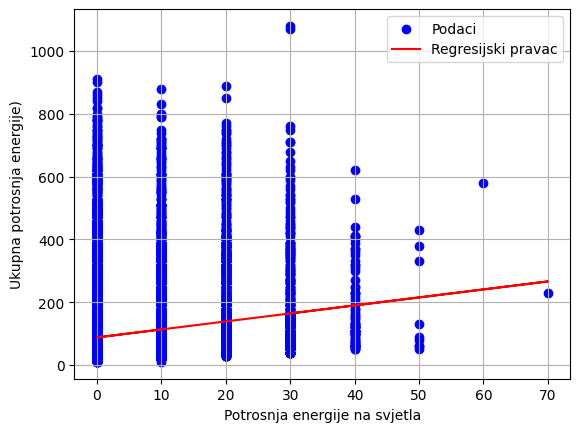

In [35]:
result = stats.linregress(X1, Y1)

slope1 = result.slope
intercept1 = result.intercept
r_value1 = result.rvalue
p_value1 = result.pvalue
std_err1 = result.stderr
intercept_stderr1 = result.intercept_stderr

print(f"Nagib (slope): {slope1}")
print(f"Odsječak (intercept): {intercept1}")

y_pred1 = intercept1 + slope1 * X1

plt.scatter(X1, Y1, color='blue', label='Podaci')
plt.plot(X1, y_pred1, color='red', label='Regresijski pravac')
plt.xlabel('Potrosnja energije na svjetla')
plt.ylabel('Ukupna potrosnja energije)')
plt.legend()
plt.grid()
plt.show()


Nagib (slope): 0.8912538771613447
Odsječak (intercept): 0.4210118447415283


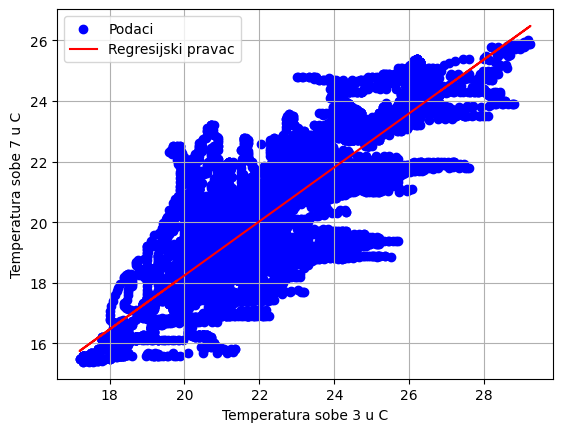

In [36]:
result2 = stats.linregress(X2, Y2)

slope2 = result2.slope
intercept2 = result2.intercept
r_value2 = result2.rvalue
p_value2 = result2.pvalue
std_err2 = result2.stderr
intercept_stderr2 = result2.intercept_stderr

print(f"Nagib (slope): {slope2}")
print(f"Odsječak (intercept): {intercept2}")

y_pred2 = intercept2 + slope2 * X2

plt.scatter(X2, Y2, color='blue', label='Podaci')
plt.plot(X2, y_pred2, color='red', label='Regresijski pravac')
plt.xlabel('Temperatura sobe 3 u C')
plt.ylabel('Temperatura sobe 7 u C')
plt.legend()
plt.grid()
plt.show()


5. Intervali povjerenja

a. Izračunajte 95% intervale povjerenja za parametre regresijskog modela



In [37]:
confidence_level = 0.95
n = len(data)
t_critical = stats.t.ppf((1 + confidence_level) / 2, df=n-2)
margin_of_error1 = t_critical * std_err1
lower_bound1 = slope1 - margin_of_error1
upper_bound1 = slope1 + margin_of_error1
print(f"Interval povjerenja za nagib modela 1 ({confidence_level*100}%): ({lower_bound1:.4f}, {upper_bound1:.4f})")

Interval povjerenja za nagib modela 1 (95.0%): (2.3719, 2.7253)


In [39]:
confidence_level = 0.95
n = len(data)
t_critical = stats.t.ppf((1 + confidence_level) / 2, df=n-2)
margin_of_error11 = t_critical * intercept_stderr1
lower_bound11 = intercept1 - margin_of_error11
upper_bound11 = intercept1 + margin_of_error11
print(f"Interval povjerenja za odječak modela 1 ({confidence_level*100}%): ({lower_bound11:.4f}, {upper_bound11:.4f})")

Interval povjerenja za odječak modela 1 (95.0%): (86.4504, 89.5605)


In [40]:
confidence_level = 0.95
n = len(data)
t_critical = stats.t.ppf((1 + confidence_level) / 2, df=n-2)
margin_of_error2 = t_critical * std_err2
lower_bound2 = slope2 - margin_of_error2
upper_bound2 = slope2 + margin_of_error2
print(f"Interval povjerenja za nagib modela 2 ({confidence_level*100}%): ({lower_bound2:.4f}, {upper_bound2:.4f})")

Interval povjerenja za nagib modela 2 (95.0%): (0.8835, 0.8990)


In [42]:
confidence_level = 0.95
n = len(data)
t_critical = stats.t.ppf((1 + confidence_level) / 2, df=n-2)
margin_of_error22 = t_critical * intercept_stderr2
lower_bound22 = intercept2 - margin_of_error22
upper_bound22 = intercept2 + margin_of_error22
print(f"Interval povjerenja za odječak modela 2 ({confidence_level*100}%): ({lower_bound22:.4f}, {upper_bound22:.4f})")

Interval povjerenja za odječak modela 2 (95.0%): (0.2468, 0.5952)


6. Analiza adekvatnsoti modela

a. Provjerite rezidualnu analizu kako biste procijenili odgovara li linearni model
podacima.

b. Izračunajte i interpretirajte 𝑅2 kao mjeru kvalitete modela.



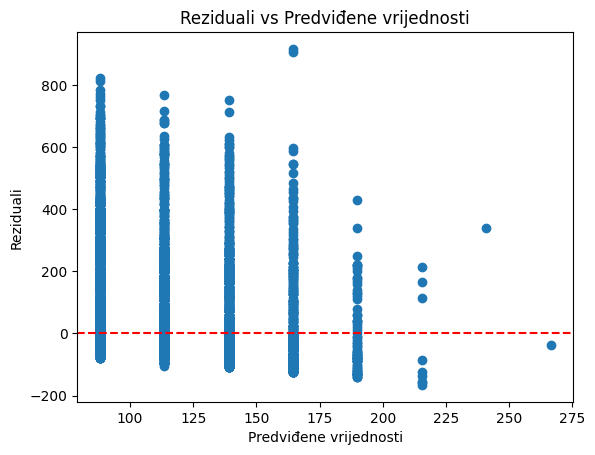

In [47]:
residuals1 = Y1 - (intercept1 + slope1 * X1)

fitted_values1 = intercept1 + slope1 * X1
plt.scatter(fitted_values1, residuals1)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predviđene vrijednosti')
plt.ylabel('Reziduali')
plt.title('Reziduali vs Predviđene vrijednosti')
plt.show()


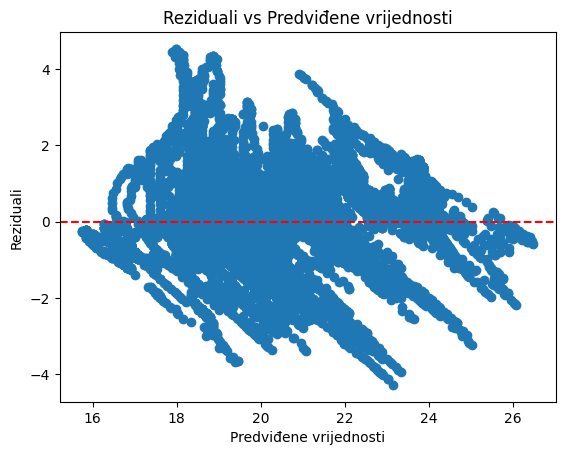

In [48]:
residuals2 = Y2 - (intercept2 + slope2 * X2)

fitted_values2 = intercept2 + slope2 * X2
plt.scatter(fitted_values2, residuals2)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predviđene vrijednosti')
plt.ylabel('Reziduali')
plt.title('Reziduali vs Predviđene vrijednosti')
plt.show()


In [43]:
print(f"Koeficijent determinacije (R^2) za model 1: {r_value1**2}")
print(f"Koeficijent determinacije (R^2) za model 2: {r_value2**2}")

Koeficijent determinacije (R^2) za model 1: 0.038918435760927704
Koeficijent determinacije (R^2) za model 2: 0.7180429451710608


Mozemo primjetiti za je R2 vrijednost za model 1 jako mala i blizu 0 sto ukazuje na losu kvalitetu modela ka predvidanju vrijednosti ukupne potrosnje energije na osnovu potrosnje energije na svjetla.

Za model 2 R2 vrijednost je relativno visoka sto ukazuje na dosta kvalitetniju kvalitetu modela ka predvidanju temperature jedne sobe na osnovu temperature druge.

7. Izračunajte Pearsonov koeficijent korelacije između ciljane i nezavisne varijable te
interpretirajte rezultat



In [44]:
print(f"Pearsonov koeficijent korelacije za model 1: {r_value1}")
print(f"Pearsonov koeficijent korelacije za model 2: {r_value2}")

Pearsonov koeficijent korelacije za model 1: 0.19727756020624268
Pearsonov koeficijent korelacije za model 2: 0.8473741470985888


Pearsonov koeficijent korelacije je dosta nizak za varijable modela 1 sto ukazuje na malu povezanost vrijednosti ove 2 varijable dok je za varijable modela 2 dosta visok sto ukazuje na medusobnu povezanost izmedu te 2 varijable.

8. Zaključak - napišite zaključak na temelju analize. Jesu li odabrane varijable linearno
povezane? Je li model adekvatan za predviđanje?

Varijable modela 1 nisu linearno povezane te je izradeni regresijski model los predviđač varijable Appliances na osnovu varijable lights.
Varijable modela 2 pokazuju visok stupanj linearne povezanosti te je izradeni regresijski model poprilično dobar predviđač varijable T3 na osnovu vrijednosti varijable T7.